In [ ]:
!nvidia-smi

Sun Jan 17 10:12:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# バージョン指定時にコメントアウト
#!pip install torch==1.7.0
#!pip install torchvision==0.8.1

import torch
import torchvision
# バージョンの確認
print(torch.__version__) 
print(torchvision.__version__) 

1.7.0+cu101
0.8.1+cu101


In [3]:
# 初期化
!cd '/content/'
!rm -rf '/content/input/'

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# データセット（画像）のダウンロード
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz -P ./input/
# データセット（アノテーション）のダウンロード
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz -P ./input/

--2021-01-31 04:29:02--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘./input/images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  34.6MB/s    in 22s     

2021-01-31 04:29:25 (33.8 MB/s) - ‘./input/images.tar.gz’ saved [791918971/791918971]

--2021-01-31 04:29:25--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘./input/annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  17.5MB/s    in 1.0s    

202

In [6]:
# データセット（画像）の解凍
!tar -zxvf ./input/images.tar.gz -C ./input
# データセット（アノテーション）の解凍
!tar -zxvf ./input/annotations.tar.gz -C ./input

ストリーミング出力は最後の 5000 行に切り捨てられました。
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian_190.png
annotation

In [7]:
import os
import os.path as osp
import pandas as pd
import shutil

In [8]:
input_dir = '/content/input/'
image_dir = osp.join(input_dir, 'images')
annotations_dir = osp.join(input_dir, 'annotations')
list_path = osp.join(annotations_dir, 'list.txt')

dataset_dir = osp.join(input_dir, 'pet')
train_dir = osp.join(dataset_dir, 'cat')

In [9]:
cols = ['file_name', 'class_id', 'species', 'breed_id']

labels = []
with open(list_path, 'r') as f:
    lines = f.read().splitlines()
    for line in lines:
        if line.startswith('#'):
            continue
        labels.append(line.split(' '))
f.close()
labels_df = pd.DataFrame(labels, columns=cols)

In [10]:
labels_df

,file_name,class_id,species,breed_id
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [11]:
cat_label_df = labels_df[labels_df.species=='1']
cat_label_df = cat_label_df.reset_index(drop=True)

In [12]:
cat_label_df

,file_name,class_id,species,breed_id
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
2366,Sphynx_95,34,1,12
2367,Sphynx_96,34,1,12
2368,Sphynx_98,34,1,12
2369,Sphynx_99,34,1,12


In [14]:
train_df = cat_label_df

# 訓練データの読み込みディクショナリに保存
for item in train_df.file_name:
    image_name = '{}.jpg'.format(item)
    image_path = osp.join(image_dir, image_name)
    
    image_save_path = osp.join(train_dir, image_name)
    os.makedirs(osp.dirname(image_save_path), exist_ok=True)
    shutil.copy(image_path, image_save_path)

In [15]:
train_dir

'/content/input/pet/cat'

In [16]:
# パッケージのインポート
import random
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

from torch.utils.data import Dataset, DataLoader, TensorDataset
#from torchvision import transforms, datasets
import torchsummary

In [17]:
# 設定
workers = 2
batch_size=16
nz = 100
nch_g = 32
nch_d = 32
n_epoch = 2000
lr = 0.0002
beta1 = 0.5
outf = '/content/gdrive/MyDrive/Colab Notebooks/gan_sample/chapter3/result_3_4-DCGAN'
display_interval = 500

# 保存先ディレクトリを作成
try:
    os.makedirs(outf, exist_ok=True)
except OSError as error: 
    print(error)
    pass

# 乱数のシード（種）を固定
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [18]:
# -*- coding: utf-8 -*-
import torch.nn as nn

def weights_init(m):
    """
    ニューラルネットワークの重みを初期化する。作成したインスタンスに対しapplyメソッドで適用する
    :param m: ニューラルネットワークを構成する層
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:            # 畳み込み層の場合
        m.weight.data.normal_(0.0, 0.02)
        m.bias.data.fill_(0)
    elif classname.find('Linear') != -1:        # 全結合層の場合
        m.weight.data.normal_(0.0, 0.02)
        m.bias.data.fill_(0)
    elif classname.find('BatchNorm') != -1:     # バッチノーマライゼーションの場合
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [19]:
class Generator(nn.Module):
    """
    生成器Gのクラス
    """
    def __init__(self, nz=100, nch_g=32, nch=3):
        """
        :param nz: 入力ベクトルzの次元
        :param nch_g: 最終層の入力チャネル数
        :param nch: 出力画像のチャネル数
        """
        super(Generator, self).__init__()

        # ニューラルネットワークの構造を定義する
        self.layers = nn.ModuleDict({
            'layer0': nn.Sequential(
                nn.ConvTranspose2d(nz, nch_g * 16, 4, 1, 0),     # 転置畳み込み
                nn.BatchNorm2d(nch_g * 16),                      # バッチノーマライゼーション
                nn.ReLU()                                        # ReLU
            ),  # (B, nz, 1, 1) -> (B, nch_g*16, 4, 4)
            'layer1': nn.Sequential(
                nn.ConvTranspose2d(nch_g * 16, nch_g * 8, 4, 2, 1),
                nn.BatchNorm2d(nch_g * 8),
                nn.ReLU()
            ),  # (B, nch_g*16, 4, 4) -> (B, nch_g*8, 8, 8)
            'layer2': nn.Sequential(
                nn.ConvTranspose2d(nch_g * 8, nch_g * 4, 4, 2, 1),
                nn.BatchNorm2d(nch_g * 4),
                nn.ReLU()
            ),  # (B, nch_g*8, 8, 8) -> (B, nch_g*4, 16, 16)

            'layer3': nn.Sequential(
                nn.ConvTranspose2d(nch_g * 4, nch_g * 2, 4, 2, 1),
                nn.BatchNorm2d(nch_g * 2),
                nn.ReLU()
            ),  # (B, nch_g*4, 16, 16) -> (B, nch_g*2, 32, 32)
            'layer4': nn.Sequential(
                nn.ConvTranspose2d(nch_g * 2, nch_g , 4, 2, 1),
                nn.BatchNorm2d(nch_g),
                nn.ReLU()
            ),  # (B, nch_g*2, 32, 32) -> (B, nch_g, 64, 64)
            'layer5': nn.Sequential(
                nn.ConvTranspose2d(nch_g, nch, 4, 2, 1),
                nn.Tanh()
            )   # (B, nch_g, 64, 64) -> (B, nch, 128, 128)
        })

    def forward(self, z):
        """
        順方向の演算
        :param z: 入力ベクトル
        :return: 生成画像
        """
        for layer in self.layers.values():  # self.layersの各層で演算を行う
            z = layer(z)
        return z

In [20]:
class Discriminator(nn.Module):
    """
    識別器Dのクラス
    """
    def __init__(self, nch=3, nch_d=32):
        """
        :param nch: 入力画像のチャネル数
        :param nch_d: 先頭層の出力チャネル数
        """
        super(Discriminator, self).__init__()

        # ニューラルネットワークの構造を定義する
        self.layers = nn.ModuleDict({
            'layer0': nn.Sequential(
                nn.Conv2d(nch, nch_d, 4, 2, 1),     # 畳み込み
                nn.LeakyReLU(negative_slope=0.2)    # leaky ReLU関数
            ),  # (B, nch, 128, 128) -> (B, nch_d, 64, 64)
            'layer1': nn.Sequential(
                nn.Conv2d(nch_d, nch_d * 2, 4, 2, 1),
                nn.BatchNorm2d(nch_d * 2),
                nn.LeakyReLU(negative_slope=0.2)
            ),  # (B, nch_d, 64, 64) -> (B, nch_d*2, 32, 32)
            'layer2': nn.Sequential(
                nn.Conv2d(nch_d * 2, nch_d * 4, 4, 2, 1),
                nn.BatchNorm2d(nch_d * 4),
                nn.LeakyReLU(negative_slope=0.2)
            ),  # (B, nch_d*2, 32, 32) -> (B, nch_d*4, 16,16)
            'layer3': nn.Sequential(
                nn.Conv2d(nch_d * 4, nch_d * 8, 4, 2, 1),
                nn.BatchNorm2d(nch_d * 8),
                nn.LeakyReLU(negative_slope=0.2)
            ),  # (B, nch_d*4, 16, 16) -> (B, nch_d*8, 8, 8)
            'layer4': nn.Sequential(
                nn.Conv2d(nch_d * 8, nch_d * 16, 4, 2, 1),
                nn.BatchNorm2d(nch_d * 16),
                nn.LeakyReLU(negative_slope=0.2)
            ),  # (B, nch_d*8, 8, 8) -> (B, nch_d*16, 4, 4)
            'layer5': nn.Sequential(
                nn.Conv2d(nch_d * 16, 1, 4, 1, 0),
                nn.Sigmoid()
            )
            # (B, nch_d*16, 4, 4) -> (B, 1, 1, 1)
        })

    def forward(self, x):
        """
        順方向の演算
        :param x: 本物画像あるいは生成画像
        :return: 識別信号
        """
        for layer in self.layers.values():  # self.layersの各層で演算を行う
            x = layer(x)
        return x.squeeze()     # Tensorの形状を(B)に変更して戻り値とする

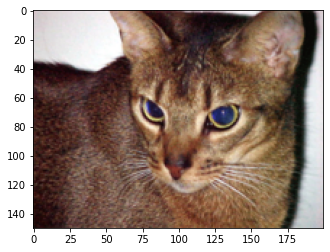

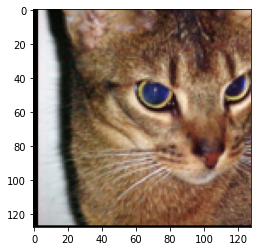

In [21]:
#画像の読み込み
image = "./input/pet/cat/Abyssinian_5.jpg"
with open(image, 'rb') as f:
    image = Image.open(f)
    image = image.convert('RGB')

plt.figure()
plt.imshow(image)

# torchvisionのデータ拡張transformsを利用
# サイズ225でセンタークロップ
trans_image = transforms.CenterCrop(225)(image)
# サイズ128でランダムクロップ
trans_image = transforms.RandomCrop(128)(trans_image)
# 左右反転    
trans_image = transforms.RandomHorizontalFlip()(trans_image)

plt.figure()
plt.imshow(trans_image)

In [22]:
dataset = dset.ImageFolder('./input/pet',
    transform=transforms.Compose([
    # サイズ225でセンタークロップ
    transforms.CenterCrop(225),
    # サイズ128でランダムクロップ    
    transforms.RandomCrop(128),
    # 左右反転                              
    transforms.RandomHorizontalFlip(),
    # Tensor化
    transforms.ToTensor(),
    # -1～1に値域の変更
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))        
]))

In [24]:
# 画像配列の確認
dataset[3][0].shape

torch.Size([3, 128, 128])

In [25]:
# 画像の域値(-1～1)の確認
dataset[3][0]

tensor([[[ 0.4824,  0.5216,  0.5765,  ..., -0.2784, -0.2549, -0.2784],
         [ 0.4980,  0.5765,  0.6314,  ..., -0.2392, -0.2078, -0.2392],
         [ 0.5686,  0.6549,  0.6784,  ..., -0.1922, -0.1608, -0.1922],
         ...,
         [-0.3804, -0.4118, -0.4118,  ..., -0.3176, -0.3725, -0.4118],
         [-0.3961, -0.3725, -0.4275,  ..., -0.3725, -0.3882, -0.4275],
         [-0.3804, -0.3804, -0.4196,  ..., -0.3412, -0.3804, -0.4902]],

        [[ 0.0431,  0.0980,  0.2000,  ..., -0.4902, -0.4667, -0.4667],
         [ 0.0510,  0.1373,  0.2549,  ..., -0.4353, -0.4039, -0.4196],
         [ 0.0980,  0.2078,  0.3098,  ..., -0.3882, -0.3412, -0.3725],
         ...,
         [-0.5608, -0.5922, -0.5765,  ..., -0.5922, -0.6392, -0.6549],
         [-0.5765, -0.5529, -0.5922,  ..., -0.6157, -0.6392, -0.6471],
         [-0.5608, -0.5608, -0.5843,  ..., -0.5765, -0.6000, -0.6863]],

        [[-0.3569, -0.2706, -0.1765,  ..., -0.5608, -0.5373, -0.5451],
         [-0.3647, -0.2627, -0.1294,  ..., -0

In [26]:
# データ件数
len(dataset)

2371

In [27]:
# 訓練データをセットしたデータローダーを作成する
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=int(workers))

# 学習に使用するデバイスを得る。可能ならGPUを使用する
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:', device)

device: cuda:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


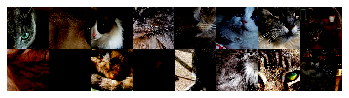

In [28]:
#import torchvision
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

for i, (images, labels) in enumerate(dataloader):
    print(labels.numpy())
    #show(torchvision.utils.make_grid(images, nrow=5, padding=1))
    show(vutils.make_grid(images, nrow=8, padding=1))
    plt.axis('off')
    
    break

In [29]:
# 生成器G。ランダムベクトルから生成画像を生成する
netG = Generator(nz=nz, nch_g=nch_g).to(device)
netG.apply(weights_init)    # weights_init関数で初期化
print(netG)

Generator(
  (layers): ModuleDict(
    (layer0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (layer1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (layer2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (layer3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (layer4): Sequential(
      (0): ConvTranspose2d(64, 32, ke

In [30]:
# 生成器GのTensor形状
torchsummary.summary(netG, (100, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,712
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,408
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,416
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,136
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13           [-1, 32, 64, 64]          32,800
      BatchNorm2d-14           [-1, 32,

In [31]:
# 識別器D。画像が本物画像か生成画像かを識別する
netD = Discriminator(nch_d=nch_d).to(device)
netD.apply(weights_init)
print(netD)

Discriminator(
  (layers): ModuleDict(
    (layer0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2)
    )
    (layer1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (layer2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (layer3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (layer4): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2,

In [32]:
# 識別器DのTensor形状
torchsummary.summary(netD, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]           1,568
         LeakyReLU-2           [-1, 32, 64, 64]               0
            Conv2d-3           [-1, 64, 32, 32]          32,832
       BatchNorm2d-4           [-1, 64, 32, 32]             128
         LeakyReLU-5           [-1, 64, 32, 32]               0
            Conv2d-6          [-1, 128, 16, 16]         131,200
       BatchNorm2d-7          [-1, 128, 16, 16]             256
         LeakyReLU-8          [-1, 128, 16, 16]               0
            Conv2d-9            [-1, 256, 8, 8]         524,544
      BatchNorm2d-10            [-1, 256, 8, 8]             512
        LeakyReLU-11            [-1, 256, 8, 8]               0
           Conv2d-12            [-1, 512, 4, 4]       2,097,664
      BatchNorm2d-13            [-1, 512, 4, 4]           1,024
        LeakyReLU-14            [-1, 51

In [33]:
criterion = nn.BCELoss()    # バイナリークロスエントロピー（Sigmoid関数無し）

# 生成器のエポックごとの画像生成に使用する確認用の固定ノイズ
fixed_noise = torch.randn(batch_size, nz, 1, 1, device=device) 

# オプティマイザ−のセットアップ
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999), weight_decay=1e-5)  # 識別器D用
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999), weight_decay=1e-5)  # 生成器G用

In [ ]:
# 学習のループ
for epoch in range(n_epoch):
    for itr, data in enumerate(dataloader):
        real_image = data[0].to(device)     # 本物画像
        sample_size = real_image.size(0)    # 画像枚数
        noise = torch.randn(sample_size, nz, 1, 1, device=device)   # 標準正規分布からノイズを生成
        
        real_target = torch.full((sample_size,), 1., device=device)     # 本物画像に対する識別信号の目標値「1」
        fake_target = torch.full((sample_size,), 0., device=device)     # 生成画像に対する識別信号の目標値「0」
        
        ############################
        # 識別器Dの更新
        ###########################
        netD.zero_grad()    # 勾配の初期化

        output = netD(real_image)   # 識別器Dで本物画像に対する識別信号を出力
        errD_real = criterion(output, real_target)  # 本物画像に対する識別信号の損失値
        D_x = output.mean().item()

        fake_image = netG(noise)    # 生成器Gでノイズから生成画像を生成
        
        output = netD(fake_image.detach())  # 識別器Dで本物画像に対する識別信号を出力
        errD_fake = criterion(output, fake_target)  #生成作画像に対する識別信号の損失値
        D_G_z1 = output.mean().item()

        errD = errD_real + errD_fake    # 識別器Dの全体の損失
        errD.backward()    # 誤差逆伝播
        optimizerD.step()   # Dのパラメーターを更新

        ############################
        # 生成器Gの更新
        ###########################
        netG.zero_grad()    # 勾配の初期化
        
        output = netD(fake_image)   # 更新した識別器Dで改めて生成画像に対する識別信号を出力
        errG = criterion(output, real_target)   # 生成器Gの損失値。Dに生成画像を本物画像と誤認させたいため目標値は「1」
        errG.backward()     # 誤差逆伝播
        D_G_z2 = output.mean().item()

        optimizerG.step()   # Gのパラメータを更新

        if itr % display_interval == 0: 
            print('[{}/{}][{}/{}] Loss_D: {:.3f} Loss_G: {:.3f} D(x): {:.3f} D(G(z)): {:.3f}/{:.3f}'
                  .format(epoch + 1, n_epoch,
                          itr + 1, len(dataloader),
                          errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
        if epoch == 0 and itr == 0:     # 初回に本物画像を保存する
            vutils.save_image(real_image, '{}/real_samples.png'.format(outf),
                              normalize=True, nrow=8)

    ############################
    # 確認用画像の生成
    ############################
    fake_image = netG(fixed_noise)  # 1エポック終了ごとに確認用の生成画像を生成する
    vutils.save_image(fake_image.detach(), '{}/fake_samples_epoch_{:03d}.png'.format(outf, epoch + 1),
                      normalize=True, nrow=8)

    ############################
    # モデルの保存
    ############################
    if (epoch + 1) % 200 == 0:   # 200エポックごとにモデルを保存する
        torch.save(netG.state_dict(), '{}/netG_epoch_{}.pth'.format(outf, epoch + 1))
        torch.save(netD.state_dict(), '{}/netD_epoch_{}.pth'.format(outf, epoch + 1))

[1/2000][1/149] Loss_D: 1.436 Loss_G: 5.147 D(x): 0.447 D(G(z)): 0.357/0.008
[2/2000][1/149] Loss_D: 0.851 Loss_G: 4.501 D(x): 0.876 D(G(z)): 0.359/0.037
[3/2000][1/149] Loss_D: 2.322 Loss_G: 15.330 D(x): 0.990 D(G(z)): 0.561/0.000
[4/2000][1/149] Loss_D: 4.104 Loss_G: 3.462 D(x): 0.994 D(G(z)): 0.971/0.086
[5/2000][1/149] Loss_D: 2.674 Loss_G: 2.375 D(x): 0.897 D(G(z)): 0.744/0.197
[6/2000][1/149] Loss_D: 0.803 Loss_G: 2.523 D(x): 0.537 D(G(z)): 0.072/0.098
[7/2000][1/149] Loss_D: 0.956 Loss_G: 3.524 D(x): 0.790 D(G(z)): 0.410/0.044
[8/2000][1/149] Loss_D: 3.328 Loss_G: 4.074 D(x): 0.951 D(G(z)): 0.936/0.029
[9/2000][1/149] Loss_D: 1.412 Loss_G: 3.944 D(x): 0.920 D(G(z)): 0.655/0.038
[10/2000][1/149] Loss_D: 0.833 Loss_G: 1.908 D(x): 0.589 D(G(z)): 0.184/0.198
[11/2000][1/149] Loss_D: 1.390 Loss_G: 1.583 D(x): 0.527 D(G(z)): 0.271/0.246
[12/2000][1/149] Loss_D: 1.116 Loss_G: 2.565 D(x): 0.551 D(G(z)): 0.303/0.106
[13/2000][1/149] Loss_D: 1.200 Loss_G: 3.717 D(x): 0.444 D(G(z)): 0.027/